# Data Analytics Project

This is a Portfolio project with the intent of showing the use of different tools such as Jupyter Notebooks and Python including lybraries as Numpy and Pandas. I'll be using a dataset from Kaggle donwloaded as a csv document. 

## Context

H&M is a global clothing retailer that operates in 75+ countries with over 5,000 stores under the various company brands, with 126,000 full-time equivalent positions.This dataset contains global locations and meta data of H&M Stores.

## Exploring data

Let us start with the basics: import libraries and the dataset itself.

In [5]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [6]:
df = pd.read_csv('/Users/vic/Documents/Programación/Data Analytics/Data Analytics Project 1/HM_all_stores.csv')

Now we can get a sample of our data frame:

In [7]:
df.head()

,storeCode,storeClass,name,phone,city,country,countryCode,longitude,latitude,timeZoneIndex,...,Tue_open_hours,Wed_open_hours,Thu_open_hours,Fri_open_hours,Sat_open_hours,Sun_open_hours,streetName1,streetName2,state,address_string
0,AE0122,Red,Mirdiff city center,+971-42316646,Dubai,United Arab Emirates,AE,55.424840,25.226280,165.0,...,10:00-22:00,10:00-22:00,10:00-23:55,10:00-23:55,10:00-23:55,10:00-22:00,Mirdiff city center,Sheikh Mohammad Bin Zayed Road,Dubai,Mirdiff city center;Sheikh Mohammad Bin Zayed ...
1,AE0149,Flagship,Dubai Mall,+971-44190346,Dubai,United Arab Emirates,AE,55.278446,25.197506,165.0,...,10:00-23:00,10:00-23:00,10:00-23:55,10:00-23:55,10:00-23:00,10:00-23:00,Dubai Mall,Sheikh Zayed Road,Dubai,Dubai Mall;Sheikh Zayed Road;Dubai;Dubai;Dubai
2,AE0209,Blue,Al Markaziyah,+971-26120870,Abu Dhabi,United Arab Emirates,AE,54.357462,24.487245,165.0,...,10:00-22:00,10:00-22:00,10:00-23:00,10:00-23:00,10:00-22:00,10:00-22:00,Al Markaziyah,World Trade Center Mall,Abu Dhabi,Al Markaziyah;World Trade Center Mall;123;Abu ...
3,AE0223,Blue,Abu Dhabi-Dubai Rd - Abu Dhabi,+971-26120851,Abu Dhabi,United Arab Emirates,AE,54.671499,24.523875,165.0,...,10:00-22:00,10:00-22:00,10:00-23:55,10:00-23:55,10:00-20:00,10:00-22:00,Abu Dhabi-Dubai Rd - Abu Dhabi,Al Bahia - Al Shahama,Abu Dhabi,Abu Dhabi-Dubai Rd - Abu Dhabi;Al Bahia - Al S...
4,AE0273,Flagship,Yas Mall,+971-24926530,Abu Dhabi,United Arab Emirates,AE,54.609720,24.488684,165.0,...,10:00-22:00,10:00-22:00,10:00-23:55,10:00-23:55,10:00-22:00,10:00-22:00,Yas Mall,NaN,Abu Dhabi,Yas Mall;;x;Abu Dhabi


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4292 entries, 0 to 4291
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   storeCode       4292 non-null   object 
 1   storeClass      4289 non-null   object 
 2   name            4290 non-null   object 
 3   phone           4140 non-null   object 
 4   city            4292 non-null   object 
 5   country         4292 non-null   object 
 6   countryCode     4292 non-null   object 
 7   longitude       4292 non-null   float64
 8   latitude        4292 non-null   float64
 9   timeZoneIndex   4289 non-null   float64
 10  Mon_open_hours  4258 non-null   object 
 11  Tue_open_hours  4258 non-null   object 
 12  Wed_open_hours  4258 non-null   object 
 13  Thu_open_hours  4258 non-null   object 
 14  Fri_open_hours  4258 non-null   object 
 15  Sat_open_hours  4258 non-null   object 
 16  Sun_open_hours  3148 non-null   object 
 17  streetName1     4292 non-null   o

  Exploring this data we have a notion of what are we working with: location data of the H&M's stores and their opening hours. There are columns with null cells and most numeric data is location information, which is mostly descriptive. Given the nature of this information, the most relevant question we can answer is : How many H&M stores are in each country and how are they distributed?
   

But before we can answer this questions we need to do something really important: To clean our data.

## Data cleaning

First, I will shorten the amount of columns we will working with. I'll keep the adress information to make sure there's no duplicates. I'll add the store code as the index to make searches more easy.

In [9]:
dfc = pd.DataFrame({
    'index':df.storeCode ,
    'country': df.country, 
    'city':df.city,
    'address': df.address_string
})

In [10]:
dfc.head()

,index,country,city,address
0,AE0122,United Arab Emirates,Dubai,Mirdiff city center;Sheikh Mohammad Bin Zayed ...
1,AE0149,United Arab Emirates,Dubai,Dubai Mall;Sheikh Zayed Road;Dubai;Dubai;Dubai
2,AE0209,United Arab Emirates,Abu Dhabi,Al Markaziyah;World Trade Center Mall;123;Abu ...
3,AE0223,United Arab Emirates,Abu Dhabi,Abu Dhabi-Dubai Rd - Abu Dhabi;Al Bahia - Al S...
4,AE0273,United Arab Emirates,Abu Dhabi,Yas Mall;;x;Abu Dhabi


Verifying 'Code' duplicates:

In [11]:
dfc [dfc.duplicated(subset = ['index'])] 

,index,country,city,address
3720,PR0001,USA,San Juan,The Mall of San Juan;1000 Mall of San Juan Bou...
3721,PR0002,USA,Bayamón,Plaza del Sol;725 West Main Avenue;00961;Bayamon


We have two duplicates: they share the same store code and the same adress. Lets drop those.

In [12]:
dfc = dfc.drop_duplicates(subset = ['index'])

In [13]:
dfc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4290 entries, 0 to 4291
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   index    4290 non-null   object
 1   country  4290 non-null   object
 2   city     4290 non-null   object
 3   address  4290 non-null   object
dtypes: object(4)
memory usage: 167.6+ KB


## Plotting and visualization

How many stores does each country have ? Let's start with how many countries in total we have and what those countries are:

In [14]:
dfc['country'].unique()

array(['United Arab Emirates', 'Austria', 'Australia',
       'Bosnia and Herzegovina', 'Belgium', 'Bulgaria', 'Bahrain',
       'Belarus', 'Canada', 'Switzerland', 'Chile', 'Mainland China',
       'Colombia', 'Cyprus', 'Czech Republic', 'Germany', 'Denmark',
       'Estonia', 'Egypt', 'Spain', 'Finland', 'France', 'UK', 'Georgia',
       'Greece', 'Hong Kong SAR', 'Croatia', 'Hungary', 'Indonesia',
       'Ireland', 'Israel', 'India', 'Iceland', 'Italy', 'Jordan',
       'Japan', 'Korea, Republic of', 'Kuwait', 'Kazakhstan', 'Lebanon',
       'Lithuania', 'Luxembourg', 'Latvia', 'Morocco', 'Macao SAR',
       'Mexico', 'Malaysia', 'Netherlands', 'Norway', 'New Zealand',
       'Oman', 'Panama', 'Peru', 'Philippines', 'Poland', 'USA',
       'Portugal', 'Qatar', 'Romania', 'Serbia', 'Russian Federation',
       'Saudi Arabia', 'Sweden', 'Singapore', 'Slovenia', 'Slovakia',
       'Thailand', 'Tunisia', 'Turkey', 'Taiwan Region', 'Ukraine',
       'Uruguay', 'Viet Nam', 'South Africa']

In [24]:
 dfc['country'].value_counts()

USA                       530
Mainland China            408
Germany                   383
UK                        215
France                    186
                         ... 
Bosnia and Herzegovina      2
Lebanon                     2
Cyprus                      1
Macao SAR                   1
Panama                      1
Name: country, Length: 74, dtype: int64

We have 74 countries and many of them have only 1 or 2 stores. It would be useful to only focus our attention on those countries with more than 100 stores.

In [26]:
 dfc['country'].value_counts().head(12)

USA                   530
Mainland China        408
Germany               383
UK                    215
France                186
Poland                178
Italy                 156
Russian Federation    146
Spain                 137
Sweden                128
Japan                 116
Norway                 96
Name: country, dtype: int64

Only 11 countries have more than 100 stores. Maybe we can plot them out to see the proportions with more ease. 

In [16]:
dfc_plot = pd.DataFrame({ 
    'Country':['USA','China','Germany','UK','France', 'Poland', 'Italy','Russian Federation','Spain','Sweden','Japan'],
    'N of stores': dfc['country'].value_counts().head(n=11)
})

<AxesSubplot:title={'center':'Number of Shops per Country'}>

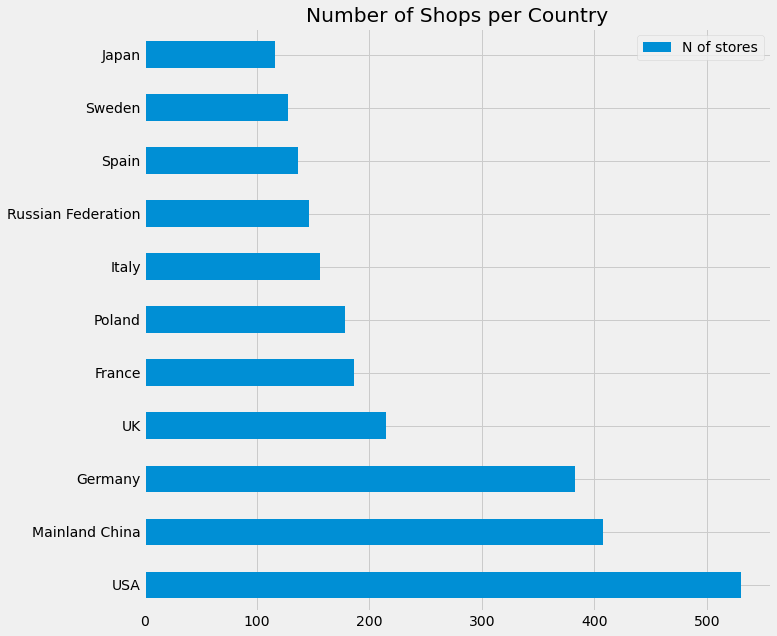

In [23]:
dfc_plot.plot.barh(figsize=(10,10), title='Number of Shops per Country')

Now we can freely interpret our information visually! we can clearly see how many stores each country have in relation to eachother: the USA have a clear advantage and it's followed by Germany and China by a margin that is comparable to the one between the UK and Germany. Every other country have fewer stores but the differences between them are not as significative. 